In [1]:
import json
import pandas as pd
from plotly import express as px
import statsmodels as sm
from sklearn.linear_model import LinearRegression


# Analyze Objects

In [13]:
with open('objects-cenlab.json') as f: 
    data = json.load(f)

In [14]:
# Clean filenames
data = {fn.strip('results-cenlab/').strip('.txt-annotated.txt.json'): vals for fn, vals in data.items()}

In [15]:
df = pd.DataFrame(data).T

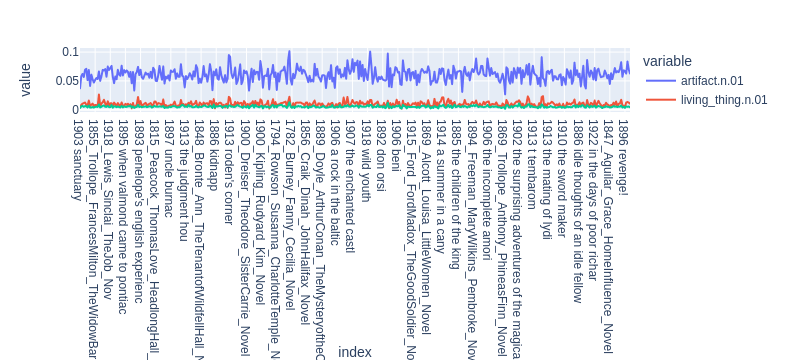

In [16]:
px.line(df)

In [17]:
df['year'] = df.index.str.slice(0,4).astype(int)

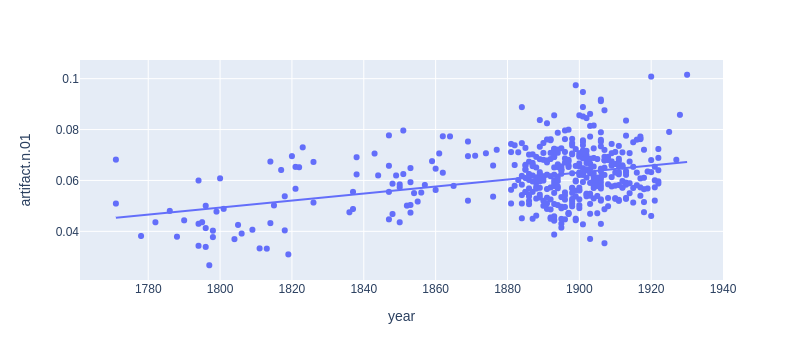

In [ ]:
px.scatter(df, x='year', y='artifact.n.01', trendline='ols')

In [19]:
linearRegression = sm.api.OLS(df['artifact.n.01'], df['year'], missing='drop').fit()
linearRegression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          artifact.n.01   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                          1.304e+04
Date:                Mon, 20 Jun 2022   Prob (F-statistic):                        0.00
Time:                        11:27:20   Log-Likelihood:                          1342.0
No. Observations:                 437   AIC:                                     -2682.
Df Residuals:                     436   BIC:                                     -2678.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year        3.253e-05   2.85e-07    114.214      0.000     3.2e-05    3.31e-05
==============================================================================
Omnibus:                        8.601   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                9.247
Skew:                           0.263   Prob(JB):                      0.00982
Kurtosis:                       3.481   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
def linearRegressionCoef(synset, df): 
    lr = LinearRegression()
    df = df[[synset, 'year']].dropna()
    lr.fit(df[['year']], df[[synset]])
    return lr.coef_[0][0]

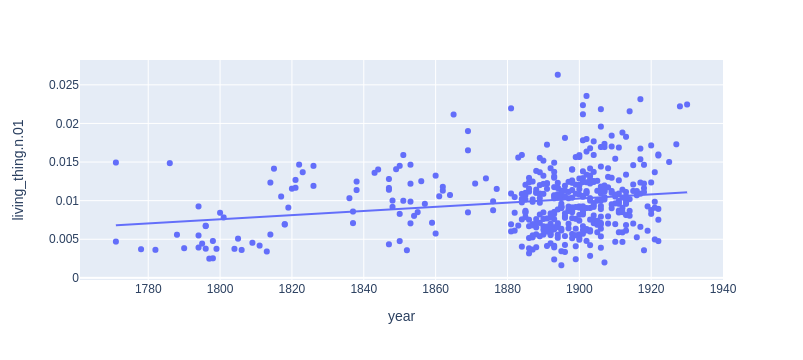

In [21]:
px.scatter(df, x='year', y='living_thing.n.01', trendline='ols')

In [22]:
linearRegression = sm.api.OLS(df['living_thing.n.01'], df['year'], missing='drop').fit()
linearRegression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      living_thing.n.01   R-squared (uncentered):                   0.854
Model:                            OLS   Adj. R-squared (uncentered):              0.854
Method:                 Least Squares   F-statistic:                              2548.
Date:                Mon, 20 Jun 2022   Prob (F-statistic):                   3.20e-184
Time:                        11:27:24   Log-Likelihood:                          1780.9
No. Observations:                 437   AIC:                                     -3560.
Df Residuals:                     436   BIC:                                     -3556.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year        5.265e-06   1.04e-07     50.482      0.000    5.06e-06    5.47e-06
==============================================================================
Omnibus:                       41.676   Durbin-Watson:                   2.134
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.920
Skew:                           0.743   Prob(JB):                     3.23e-12
Kurtosis:                       3.834   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
synsets = list(df.columns)
synsets.remove('year')
pd.Series({synset: linearRegressionCoef(synset, df) for synset in synsets}).sort_values()

natural_object.n.01    0.000013
living_thing.n.01      0.000027
artifact.n.01          0.000138
dtype: float64

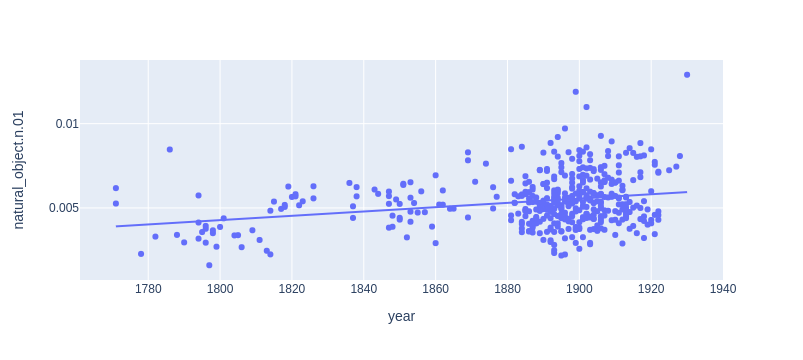

In [24]:
px.scatter(df, x='year', y='natural_object.n.01', trendline='ols')

In [25]:
df['living_thing.n.01'].sort_values(ascending=False)

1894_Kipling_Rudyard_TheJungleBook_Novel       0.026306
1902 the diary of a goose girl                 0.023560
1917_Webb_Mary_GonetoEart_Novel                0.023142
1930_Mansfield_Katherine_TheAloe_Novel         0.022456
1901 the wouldbeg                              0.022368
                                                 ...   
1797_Foster_HannahWebster_TheCoquette_Novel    0.002490
1899 jennie baxter journali                    0.002415
1893 from whose bour                           0.002385
1907 madame de treym                           0.001994
1895 the paying gu                             0.001634
Name: living_thing.n.01, Length: 437, dtype: float64

In [26]:
df['natural_object.n.01'].sort_values(ascending=False)

1930_Mansfield_Katherine_TheAloe_Novel                                       0.012900
1899 the story of the treasure seeker                                        0.011890
1902 the surprising adventures of the magical monarch of mo and his peopl    0.010986
1896 the village watchtower                                                  0.009712
1906 the story of the amul                                                   0.009274
                                                                               ...   
1778_Burney_Fanny_Evelina_Novel                                              0.002274
1814_Austen_Jane_MansfieldPark_Novel                                         0.002245
1896 one day's courtship                                                     0.002238
1895 the paying gu                                                           0.002178
1797_Foster_HannahWebster_TheCoquette_Novel                                  0.001601
Name: natural_object.n.01, Length: 437, dtype: float64

In [27]:
df['artifact.n.01'].sort_values(ascending=False)

1930_Mansfield_Katherine_TheAloe_Novel         0.101529
1920_DosPassos_John_ThreeSoldiers_Novel        0.100807
1899 the story of the treasure seeker          0.097413
1901 the wouldbeg                              0.094743
1906 the railway childr                        0.091783
                                                 ...   
1796_Hays_Mary_EmmaCourtney_Novel              0.033884
1811_Austen_Jane_SenseandSensibility_Novel     0.033297
1813_Austen_Jane_PrideandPrejudice_Novel       0.033201
1819_Shelley_Mary_Mathilda_Novel               0.030940
1797_Foster_HannahWebster_TheCoquette_Novel    0.026676
Name: artifact.n.01, Length: 437, dtype: float64

# Analyze Artifacts

In [28]:
with open('objects.json') as f: 
    data = json.load(f)

In [29]:
data = {fn.strip('results/').strip('.json'): vals for fn, vals in data.items()}

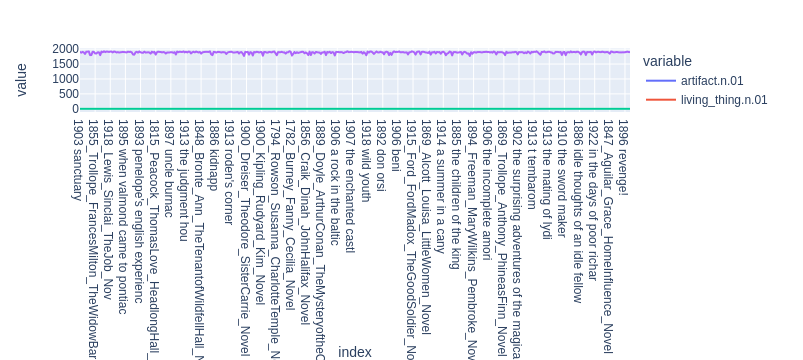

In [30]:
px.line(df)

In [31]:
df

,artifact.n.01,living_thing.n.01,natural_object.n.01,year
1903 sanctuary,0.037021,0.002848,0.002848,1903
1882 mr isaac,0.057898,0.008434,0.005813,1882
1907 the weaver,0.062173,0.010456,0.006535,1907
1888_Ward_Mrs.Humphry_RobertElsmere_Novel,0.056761,0.011430,0.004908,1888
1838_Poe_EdgarAllen_TheNarrativeofArthurGordonPym_Novel,0.069120,0.012473,0.006236,1838
...,...,...,...,...
1896 revenge!,0.067019,0.005411,0.003197,1896
1904 the law of the l,0.062708,0.012542,0.005887,1904
1913 the woman thou gavest m,0.083522,0.013367,0.005023,1913
1902 the valley of decisi,0.069933,0.012381,0.005628,1902


In [32]:
df['year'] = df.index.str.slice(0,4).astype(int)

In [33]:
# Only work with the top N categories
subset = list(df.mean().sort_values(ascending=False).head(20).index)
subset.remove('year')

In [34]:
allCoefs = pd.Series({synset: linearRegressionCoef(synset, df) for synset in subset})
allCoefs.sort_values()

natural_object.n.01    0.000013
living_thing.n.01      0.000027
artifact.n.01          0.000138
dtype: float64

In [35]:
subset = df[df.mean().sort_values(ascending=False).head(5).index]
subset = subset.drop('year', axis=1)

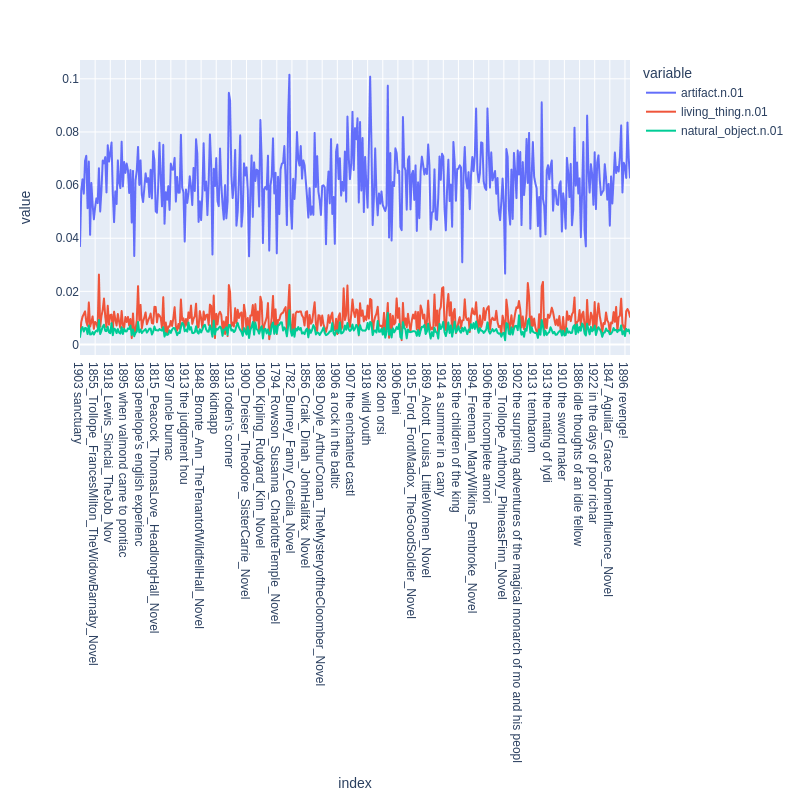

In [36]:
px.line(subset, height=800)

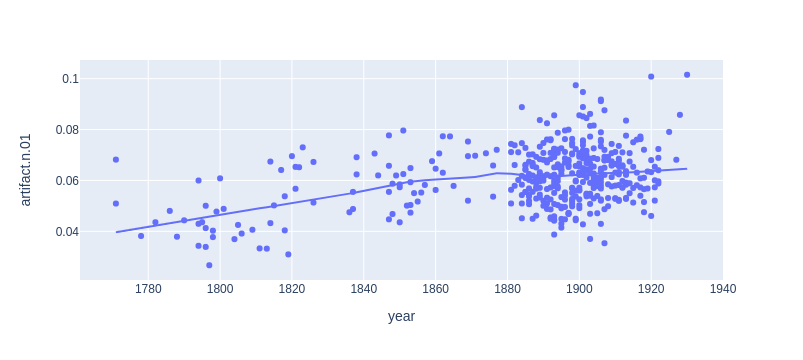

In [43]:
px.scatter(df, x='year', y='artifact.n.01', trendline='lowess')

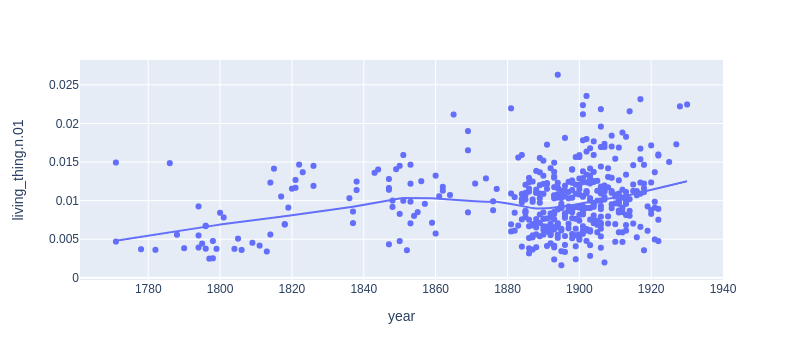

In [44]:
px.scatter(df, x='year', y='living_thing.n.01', trendline='lowess')

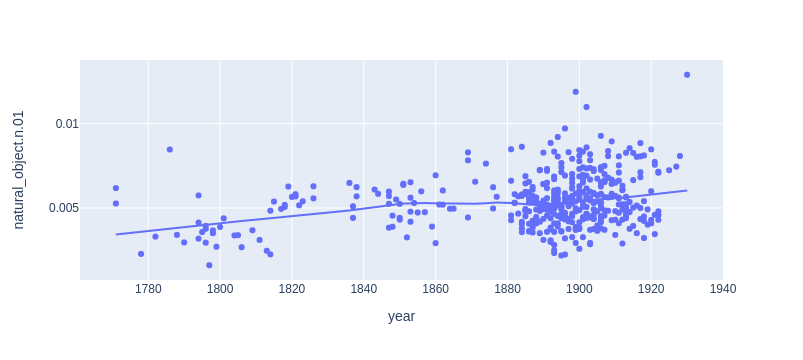

In [45]:
px.scatter(df, x='year', y='natural_object.n.01', trendline='lowess')

In [40]:
df['living_thing.n.01'].sort_values(ascending=False)

1894_Kipling_Rudyard_TheJungleBook_Novel       0.026306
1902 the diary of a goose girl                 0.023560
1917_Webb_Mary_GonetoEart_Novel                0.023142
1930_Mansfield_Katherine_TheAloe_Novel         0.022456
1901 the wouldbeg                              0.022368
                                                 ...   
1797_Foster_HannahWebster_TheCoquette_Novel    0.002490
1899 jennie baxter journali                    0.002415
1893 from whose bour                           0.002385
1907 madame de treym                           0.001994
1895 the paying gu                             0.001634
Name: living_thing.n.01, Length: 437, dtype: float64

In [41]:
df['natural_object.n.01'].sort_values(ascending=False)

1930_Mansfield_Katherine_TheAloe_Novel                                       0.012900
1899 the story of the treasure seeker                                        0.011890
1902 the surprising adventures of the magical monarch of mo and his peopl    0.010986
1896 the village watchtower                                                  0.009712
1906 the story of the amul                                                   0.009274
                                                                               ...   
1778_Burney_Fanny_Evelina_Novel                                              0.002274
1814_Austen_Jane_MansfieldPark_Novel                                         0.002245
1896 one day's courtship                                                     0.002238
1895 the paying gu                                                           0.002178
1797_Foster_HannahWebster_TheCoquette_Novel                                  0.001601
Name: natural_object.n.01, Length: 437, dtype: float64

In [42]:
df['artifact.n.01'].sort_values(ascending=False)

1930_Mansfield_Katherine_TheAloe_Novel         0.101529
1920_DosPassos_John_ThreeSoldiers_Novel        0.100807
1899 the story of the treasure seeker          0.097413
1901 the wouldbeg                              0.094743
1906 the railway childr                        0.091783
                                                 ...   
1796_Hays_Mary_EmmaCourtney_Novel              0.033884
1811_Austen_Jane_SenseandSensibility_Novel     0.033297
1813_Austen_Jane_PrideandPrejudice_Novel       0.033201
1819_Shelley_Mary_Mathilda_Novel               0.030940
1797_Foster_HannahWebster_TheCoquette_Novel    0.026676
Name: artifact.n.01, Length: 437, dtype: float64